# The Normal Equation

## Generating a linear-looking data to test the equation on

In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

In [2]:
from matplotlib import pyplot as plt

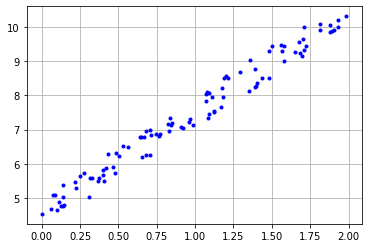

In [7]:
plt.plot(X, y, 'b.')
plt.grid("on")
plt.show()

In [9]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [10]:
theta_best

array([[4.65750462],
       [2.85879481]])

In [13]:
# making some predictions
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.65750462],
       [10.37509425]])

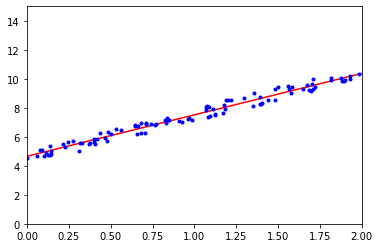

In [14]:
# plotting the predicted values
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [15]:
# using sklearn 
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.65750462]), array([[2.85879481]]))

In [16]:
lin_reg.predict(X_new)

array([[ 4.65750462],
       [10.37509425]])

In [17]:
# using scipy's least squares to find theta_best
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.65750462],
       [2.85879481]])

In [18]:
# using the pseudoinverse of X: theta_best = pinv(X_b).y
np.linalg.pinv(X_b).dot(y)

array([[4.65750462],
       [2.85879481]])

# Gradient Descent

## Batch Gradient Descent

In [19]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.rand(2, 1)

for iteration in range(n_iterations):
    gradients = (2/m) * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - (eta * gradients)

In [20]:
theta

array([[4.65750462],
       [2.85879481]])

## Stochastic Gradient Descent

In [21]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.rand(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - (eta * gradients)

In [22]:
theta

array([[4.65981165],
       [2.85525154]])

In [25]:
# using sklearn
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [26]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.65575182]), array([2.89811515]))

# Polynomial Regression